In [27]:
image_size = (128, 128)
dataset_path = 'dataset/training'
X, y = [], []

In [28]:
import os
import cv2
import numpy as np

for label in os.listdir(dataset_path):
    for file in os.listdir(os.path.join(dataset_path, label)):
        img_path = os.path.join(dataset_path, label, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, image_size)
            X.append(img.flatten())
            y.append(label)

X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [30]:
import pickle

# Save model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(model, f)


🔍 Predicting image: dataset/training/siap_petik/siap13.png
🧠 Predicted class: siap_petik


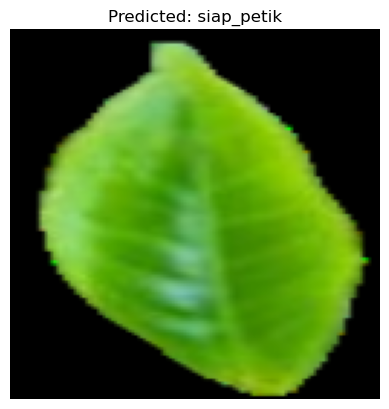

In [31]:
import glob
import matplotlib.pyplot as plt

test_image_path = 'dataset/training/siap_petik/siap13.png'  # Change this to your test image
if not os.path.exists(test_image_path):
    for ext in ('jpg', 'jpeg', 'png'):
        match = glob.glob(f'test.{ext}')
        if match:
            test_image_path = match[0]
            break
    else:
        test_image_path = None

# Prediction section
if test_image_path and os.path.exists(test_image_path):
    print(f"\n🔍 Predicting image: {test_image_path}")
    img = cv2.imread(test_image_path)
    img = cv2.resize(img, image_size)
    img_flat = img.flatten().reshape(1, -1)

    prediction = model.predict(img_flat)
    predicted_class = prediction[0]
    print(f"🧠 Predicted class: {predicted_class}")

    # Show image with prediction
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

else:
    print("⚠️ Test image not found.")